Detection d'anomalies - Modèle Local Outlier Factor

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import LocalOutlierFactor

plt.style.use('dark_background')  # 🕶️ Dark mode

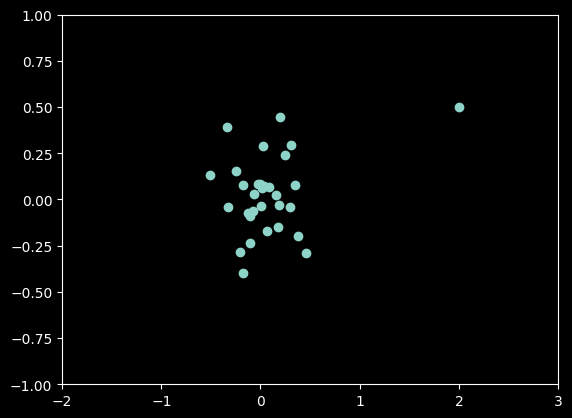

In [11]:
# Generer quelques points au hasard
np.random.seed(0)

X = np.random.randn(30, 2) * 0.2
X = np.concatenate((X, np.array([[2, 0.5]])), axis=0)

plt.scatter(X[:, 0], X[:, 1])
plt.xlim(-2, 3)
plt.ylim(-1, 1)

plt.show()

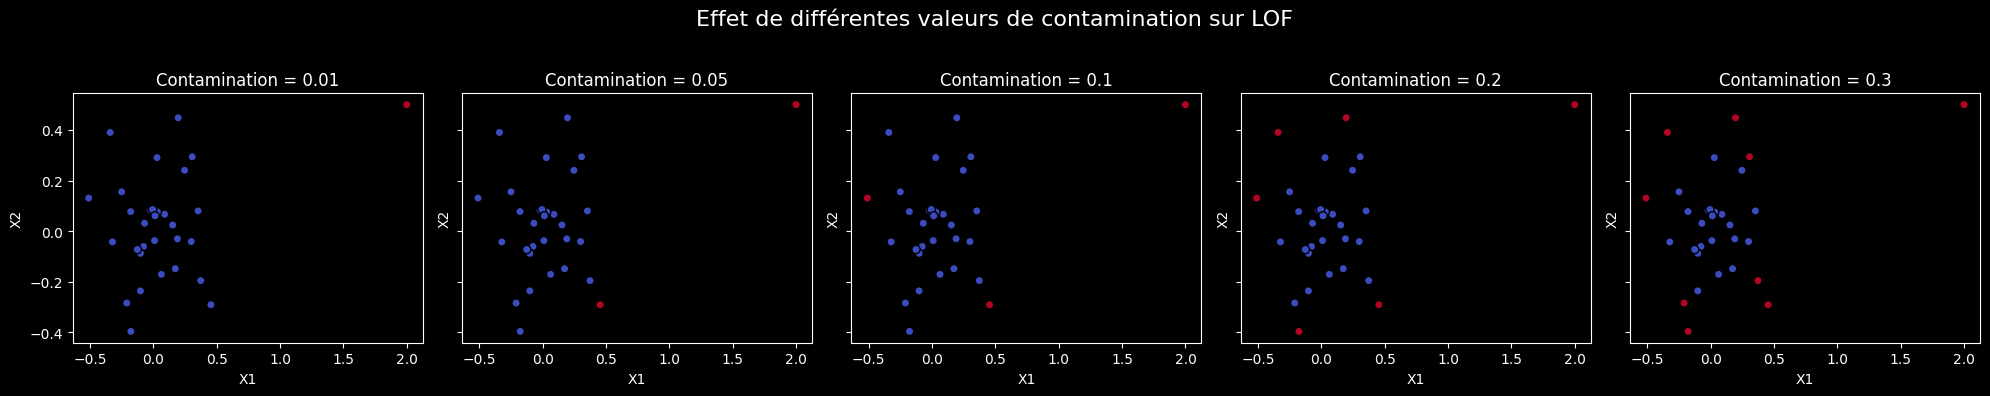

In [16]:
# determiner la meilleure valeur de la contamination

# Liste de valeurs de contamination à tester
contamination_values = [0.01, 0.05, 0.1, 0.2, 0.3]

# Création des sous-graphiques
fig, axes = plt.subplots(1, len(contamination_values), figsize=(20, 4), sharex=True, sharey=True)

for ax, contamination in zip(axes, contamination_values):
    model = LocalOutlierFactor(n_neighbors=20, contamination=contamination)
    y_pred = model.fit_predict(X)
    
    ax.scatter(X[:, 0], X[:, 1], c=(y_pred == -1), cmap="coolwarm", edgecolor='k')
    ax.set_title(f"Contamination = {contamination}")
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")

plt.suptitle("Effet de différentes valeurs de contamination sur LOF", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

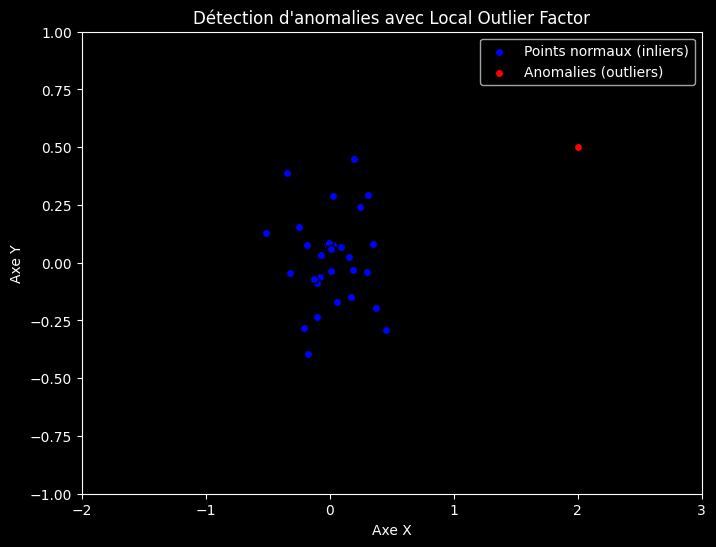

In [19]:
# Création du modèle LOF avec contamination à 1%
model = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
predictions = model.fit_predict(X)

# Création de la figure
plt.figure(figsize=(8, 6))

# Séparer les points normaux et les anomalies pour la légende
inliers = X[predictions == 1]
outliers = X[predictions == -1]

# Affichage
plt.scatter(inliers[:, 0], inliers[:, 1], c='blue', edgecolor='k', label='Points normaux (inliers)')
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', edgecolor='k', label='Anomalies (outliers)')

# Labels et titre
plt.xlabel('Axe X')
plt.ylabel('Axe Y')
plt.title('Détection d\'anomalies avec Local Outlier Factor')

# Limites de l'affichage
plt.xlim(-2, 3)
plt.ylim(-1, 1)

# Légende
plt.legend()

# Affichage
plt.show()